# Environments Playground

This notebook is for visual inspection of the various environments provided by the RAIL Group `environments` package.

In [1]:
# Define a function to generate an environment from arguments,
# visualize the map and some images from the simulator

def gen_and_visualize_environment(args):
    known_map, map_data, pose, goal = environments.generate.map_and_poses(args)

    builder = environments.simulated.WorldBuildingUnityBridge

    # A helper object for passing map data to the simulator
    world = environments.simulated.OccupancyGridWorld(
        known_map, map_data, 
        num_breadcrumb_elements=args.num_breadcrumb_elements,
    min_breadcrumb_signed_distance=4.0 * args.base_resolution)

    # Open the simulator and generate an image
    with builder(args.unity_path) as unity_bridge:
        # Populate the simulated world with objects via the 'world'
        # helper object.
        unity_bridge.make_world(world)

        plt.figure(figsize=(9, 3))

        # Get+plot simulated images at the start
        unity_bridge.move_object_to_pose("robot", args.base_resolution * pose)
        pano_image = unity_bridge.get_image("robot/pano_camera")
        pano_depth = environments.utils.convert.depths_from_depth_image(
            unity_bridge.get_image("robot/pano_depth_camera"))
        pano_seg = unity_bridge.get_image("robot/pano_segmentation_camera")
        sh = pano_image.shape
        ax = plt.subplot(341)
        plt.imshow(pano_image[sh[0]//4:3*sh[0]//4])
        plt.title("Start (blue)")
        ax = plt.subplot(345)
        plt.imshow(pano_depth[sh[0]//4:3*sh[0]//4], 
                   cmap='gray_r', vmin=0, vmax=64)
        ax = plt.subplot(349)
        plt.imshow(pano_seg[sh[0]//4:3*sh[0]//4])
        
        # Get+plot simulated images at the goal
        unity_bridge.move_object_to_pose("robot", args.base_resolution * goal)
        pano_image = unity_bridge.get_image("robot/pano_camera")
        pano_depth = environments.utils.convert.depths_from_depth_image(
            unity_bridge.get_image("robot/pano_depth_camera"))
        pano_seg = unity_bridge.get_image("robot/pano_segmentation_camera")
        sh = pano_image.shape
        ax = plt.subplot(342)
        plt.imshow(pano_image[sh[0]//4:3*sh[0]//4])
        plt.title("Goal (green)")
        ax = plt.subplot(346)
        plt.imshow(pano_depth[sh[0]//4:3*sh[0]//4], 
                   cmap='gray_r', vmin=0, vmax=64)
        ax = plt.subplot(3,4,10)
        plt.imshow(pano_seg[sh[0]//4:3*sh[0]//4])

    ax = plt.subplot(143)
    lsp.utils.plotting.plot_navigation_data(
        ax, known_map, map_data=map_data, 
        robot_pose=args.base_resolution*pose,
        goal_pose=args.base_resolution*goal)
    plt.title(f"env: {args.map_type}, seed: {args.current_seed}")
    
    if 'semantic_grid' in map_data.keys():
        ax = plt.subplot(144)
        lsp.utils.plotting.plot_grid_to_scale(ax, map_data['semantic_grid'], map_data)
        
    plt.show()

None

In [2]:
import environments
import lsp
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import gridmap
import sys

print("Python Version and System Information")
print(sys.version)

def get_args():
    # Set the arguments (usually done via the command line)
    args = lambda: None
    args.current_seed = 2005
    args.unity_path = '/unity/rail_sim.x86_64'
    args.save_dir = './'

    # Robot Arguments
    args.step_size = 1.8
    args.num_primitives = 32
    args.laser_scanner_num_points = 1024
    args.field_of_view_deg = 360
    
    return args


Python Version and System Information
3.8.10 (default, May 26 2023, 14:05:08) 
[GCC 9.4.0]


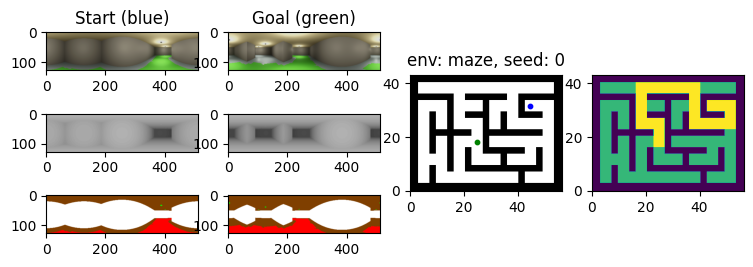

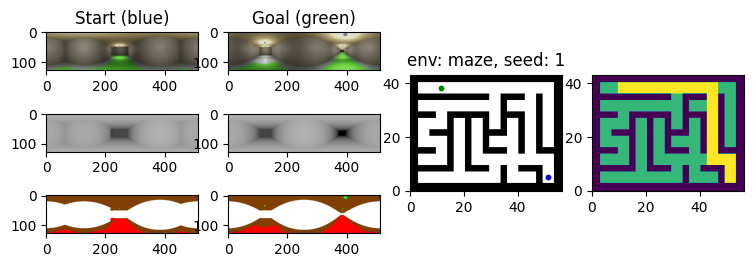

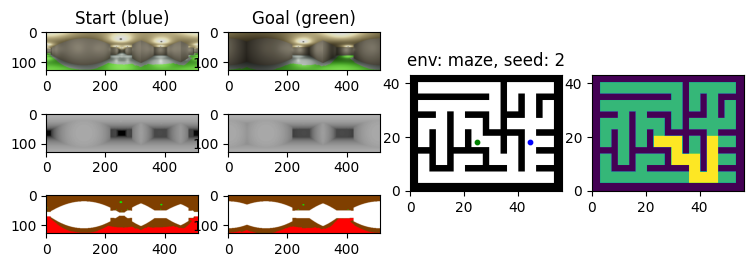

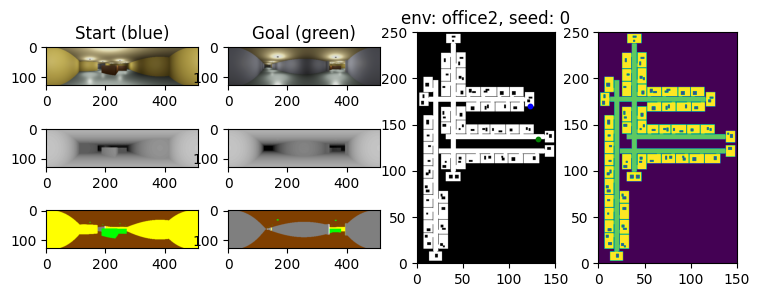

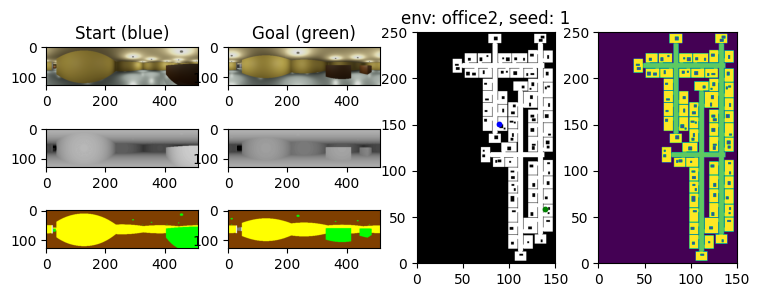

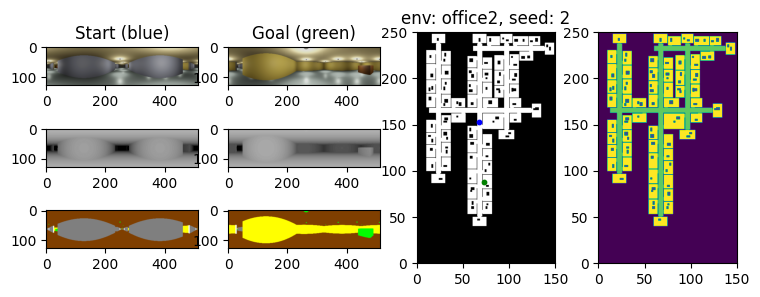

In [3]:
ENVIRONMENTS = ['maze', 'office2']
NUM_SEEDS_PER_ENV = 3


for env in ENVIRONMENTS:
    for seed in range(NUM_SEEDS_PER_ENV):
        args = get_args()
        args.map_type = env
        args.current_seed = seed
        gen_and_visualize_environment(args)
